<a href="https://colab.research.google.com/github/Ianfm94/Financial_Analysis/blob/master/LSTM_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

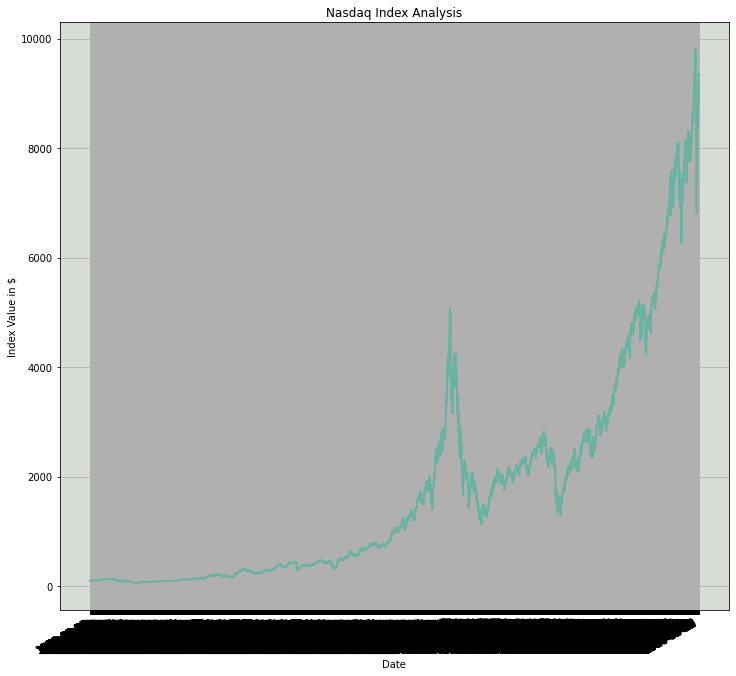

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import glob

from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image
import skimage.io as io
import tensorflow as tf

# Attaching files from Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

nasdaq_data = "NASDAQ_data US Listing.csv"

X = pd.read_csv(nasdaq_data)
Y = X['close']
#print(X.head(n=3))

from matplotlib.dates import DateFormatter

# Create figure and plot space
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 12))

# Add x-axis and y-axis, colour of graph and increase 
# the line-width
ax.plot(X['date'],
       X['mid_price'],
       color='#69b3a2', lw=2)

# Set title and labels for axes
ax.set(xlabel='Date',
       ylabel='Index Value in $',
       title='Nasdaq Index Analysis')

# Change plot background colour
ax.set_facecolor('xkcd:light grey')

# Add grid, change gridlines to black
plt.grid(b=True, which='both', axis='both', dashes='on')

#Fix dates
myFmt = mdates.DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.show()


In [6]:
Y = np.array(Y)
X = np.array(X)

np.random.seed(111)

X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.25, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of test samples: ", X_test.shape)
print("Labels for training and testing data")

Total number of training samples:  (9324, 8)
Total number of test samples:  (3109, 8)
Labels for training and testing data
[2340.820068     75.19000244 1483.27002    ...  432.2999878  2816.030029
 7489.069824  ]
[ 769.6400146 4942.439941   135.6499939 ... 1571.589966   247.0899963
  169.9900055]


In [0]:
# LSTM Workings

